## Understanding Sampling Variance
Each sample of data we observe is assumed to be a realisation from some underlying density $p(x)$, with some (possibly deterministic) distribution of labels $p(y|x)$. 

Since we only observe an empirical sample, we are unable to calculate the optimal $\hat{p}(y|x)$ for the problem, and instead calculate an estimate, *that depends on the particular sample of data we observe*: $\hat{p}_{est}(y|x)$. Suppose we observe multiple datasets $\mathcal{D}_1$ and $\mathcal{D}_2$. We will obtain two estimates, $\hat{p}_{\mathcal{D}_1}(y|x)$, $\hat{p}_{\mathcal{D}_2}(y|x)$, where in general $\hat{p}_{\mathcal{D}_1}(y|x) \ne\hat{p}_{\mathcal{D}_2}(y|x)$. We say the difference in observed data between $\mathcal{D}_1$ and $\mathcal{D}_2$ is due to **sampling variance**, and the difference in our classifier or regressors is due to the same.

Suppose our $\hat{p}_{est}(y|x)$ are parameterised by some $\theta$. Every time we perform an experiment we expect to get a different $\theta$. The variance between these $\theta$s for *iid* data is due to sampling variance, and we may characterise a given algorithm for estimating $\hat{p}_{est}(y|x)$ by the **variance** it exhibits between training sets, and the **bias** it demonstrates over all datasets.

Below is a visualisation of this process. Suppose we observe a set of data for a simple 1D regression problem. The least squares solution in the case where the true $p(y|x)$ is Gaussian is well characterised and understood. In the below we look at an example of how the regression parameters vary across different datasets. In the final cells we plot a distribution over the slopes our regression model has learned. This is an example of an algorithm with low bias and low variance. Note that for a more interesting dataset, the algorithm would usually be characterised as *high* bias, low variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
w_true = [2,0.7]
def generate_sample(n, sigma):
    x = np.random.randn(n)
    y = x*w_true[1] + w_true[0]
    y = y + sigma*np.random.randn(n)
    return x, y

def estimate_w(x, y):
    x = np.stack((np.ones_like(x), x), 1)
    q, r = np.linalg.qr(x)
    return np.linalg.solve(r, q.T.dot(y))

save_est = []

<IPython.core.display.Javascript object>


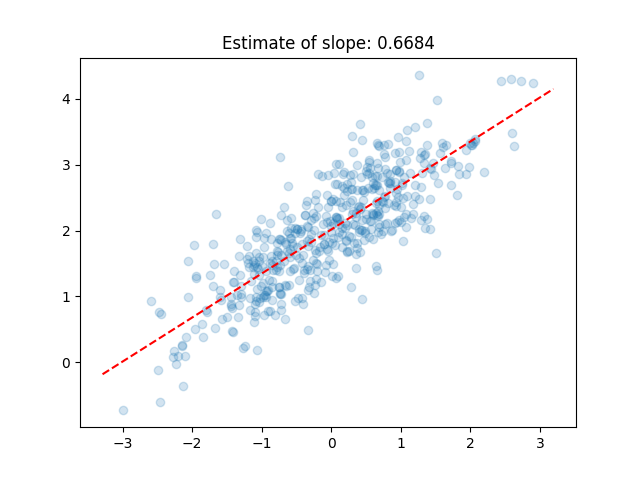

In [106]:
%matplotlib notebook
def abline(slope, intercept):
    """Plot a line from slope and intercept - thanks to https://stackoverflow.com/a/43811762"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')

x, y = generate_sample(500, 0.5)
plt.scatter(x, y, alpha=0.2)
w = estimate_w(x,y)
abline(*w[::-1])
plt.title('Estimate of slope: ' + str(np.round(w[1],4)))
save_est.append(w)

#### Now let's take a look at all the estimates we have obtained so far
(Make sure you have run the above cell at least 5-10 times.)

In [116]:
save_est

[array([ 1.97803414,  0.70678046]),
 array([ 1.96562579,  0.72103157]),
 array([ 2.00393423,  0.73083774]),
 array([ 1.99478595,  0.69003986]),
 array([ 2.01307958,  0.72725724]),
 array([ 1.95964407,  0.67144239]),
 array([ 1.97493493,  0.70323095]),
 array([ 2.01759467,  0.72441148]),
 array([ 1.99755772,  0.7140323 ]),
 array([ 1.96724786,  0.69679882]),
 array([ 2.01479208,  0.7055297 ]),
 array([ 2.00013011,  0.64026979]),
 array([ 2.01629806,  0.7072006 ]),
 array([ 2.02168225,  0.68318677]),
 array([ 2.01681482,  0.6684042 ])]

<IPython.core.display.Javascript object>


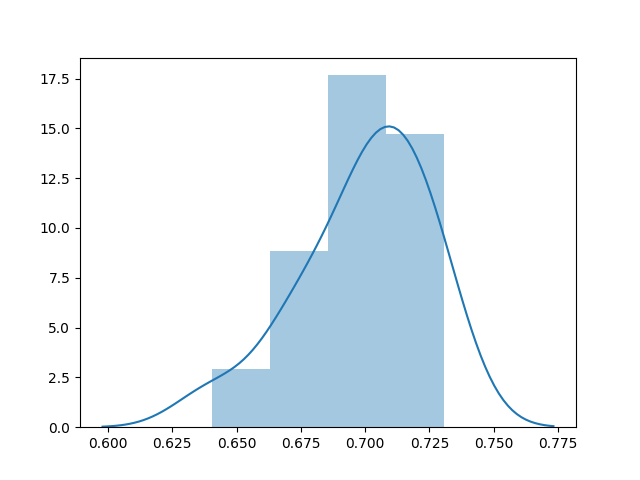

In [115]:
import seaborn as sns
%matplotlib notebook
sns.distplot(np.array(save_est)[:,1])

<IPython.core.display.Javascript object>


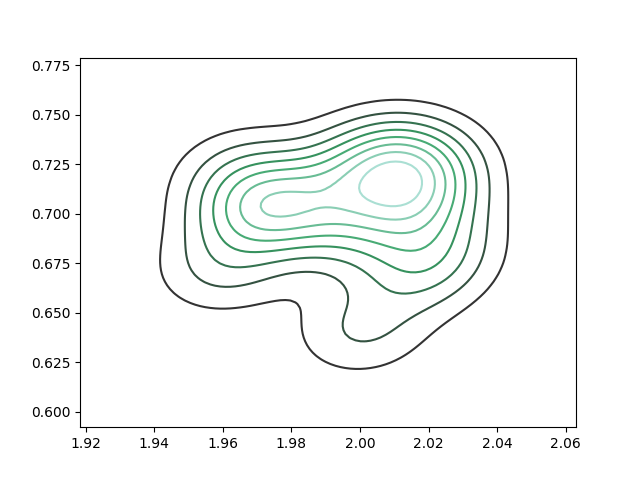

In [113]:
import seaborn as sns
%matplotlib notebook
sns.kdeplot(np.array(save_est))